在OpenCV中，对于行数和列数都可以分解为 $2^p3^q5^r$ 的矩阵，函数`cv.dft`采用快速傅立叶变换，可以提高运行速度。
因此，推荐将图像的尺寸扩充为2、3、5的整数倍

`cv.getOptimalDFTSize` 用于根据输入的数组长度计算快速傅立叶变换的最优扩充尺寸

In [7]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# (1) 创建原始图像
img = np.zeros((1101, 1821), np.uint8)
cv.rectangle(img, (100, 100), (900,900), 128, -1)  # 白色
cv.circle(img, (500, 500), 306, 225, -1)  # -1 表示内部填充

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

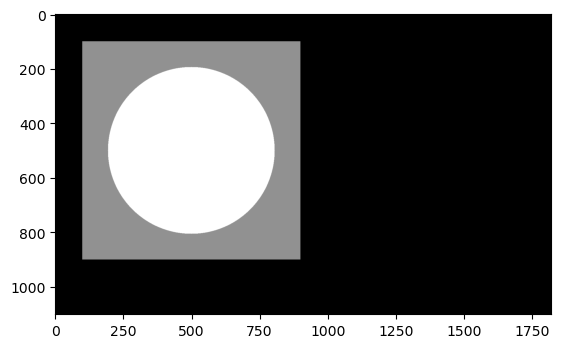

In [9]:
plt.imshow(img, cmap='gray')

In [3]:
# (2) Numpy 实现快速傅里叶变换
timeBegin = cv.getTickCount()
fft = np.fft.fft2(img)  # 傅里叶变换，fft 是复数数组
timeEnd = cv.getTickCount()
time = (timeEnd - timeBegin) / cv.getTickFrequency()
print("FFT with size {} by Numpy: {} sec".format(img.shape, round(time, 4)))

FFT with size (1101, 1821) by Numpy: 0.2021 sec


In [4]:
# (3) OpenCV 非最优尺寸的图像傅里叶变换
imgFloat = img.astype(np.float32)  # 将图像转换成 float32
timeBegin = cv.getTickCount()
dft = cv.dft(imgFloat, flags=cv.DFT_COMPLEX_OUTPUT)  # (1101, 1820,2)
timeEnd = cv.getTickCount()
time = (timeEnd - timeBegin) / cv.getTickFrequency()
print("DFT with size {} by OpenCV: {} sec".format(img.shape, round(time, 4)))

DFT with size (1101, 1821) by OpenCV: 0.0279 sec


In [5]:
# (4) OpenCV 最优尺寸扩充的快速傅里叶变换
timeBegin = cv.getTickCount()
height, width = img.shape[:2]  # 高度，宽度
hPad = cv.getOptimalDFTSize(height)  # DFT 最优尺寸
wPad = cv.getOptimalDFTSize(width)
imgOpt = np.zeros((hPad, wPad), np.float32)  # 初始化扩充图像
imgOpt[:height, :width] = imgFloat  # 下侧和右侧补 0
dftOpt = cv.dft(imgOpt, cv.DFT_COMPLEX_OUTPUT)  # 傅里叶变换
timeEnd = cv.getTickCount()
time = (timeEnd - timeBegin) / cv.getTickFrequency()
print("DFT with optimized size {} by OpenCV: {} sec".format(imgOpt.shape, round(time, 4)))

DFT with optimized size (1125, 1875) by OpenCV: 0.0157 sec
